In [35]:
import pandas as pd
import pickle
import numpy as np
import time
import torch

import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [36]:
data_path = 'mathorcup_recom_listwise/data/'

# Load Candidates ID

In [37]:
recomm_result_df = pd.read_csv(data_path + 'recomm_result.csv', dtype=str, header=None, names=['userID', 'contentID'])
recomm_result_df

,userID,contentID
0,2263674210,506452865;507146538;507040429;506448411;507802...
1,2407104270,133675654658;133657843524;133682981897;1336828...
2,1850876254,133675493354;133682019937;133684077954;5077602...
3,2208092618,133673251676;133666957709;133678083250;1336686...
4,1642551254,133686242032;133663752853;133663752851;1336809...
...,...,...
4995,1167815814,133680407376;133686363980;133679405886;1336611...
4996,2452835534,133677820984;133682784796;133684723439;1336808...
4997,1517277558,508112085;509016369;508288515;133669933984;133...
4998,2223184164,506602551;507158054;508320262;506389422;506389...


In [38]:
candidateIDs = recomm_result_df['userID']
candidateIDs

0       2263674210
1       2407104270
2       1850876254
3       2208092618
4       1642551254
           ...    
4995    1167815814
4996    2452835534
4997    1517277558
4998    2223184164
4999    1423562960
Name: userID, Length: 5000, dtype: object

# Preliminary Match Analyze

In [39]:
with open(data_path + 'userID2idx.pickle', 'rb') as handle:
    userID2idx = pickle.load(handle)
len(userID2idx)

958123

In [40]:
candidateIdxes = [userID2idx[_] for _ in candidateIDs]
len(candidateIdxes), candidateIdxes[0]

(5000, '0493108')

In [41]:
with open(data_path + 'contentTC2ID.pickle', 'rb') as handle:
    contentTC2ID = pickle.load(handle)
len(contentTC2ID), contentTC2ID['n两性/两性健康'][:5]

(1485, ['505670245', '505857707', '506010721', '506062643', '506204447'])

In [42]:
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)
len(contentID2idx)

2510703

In [79]:
userID = candidateIDs[2922]
idx = userID2idx[userID]
aaa, bb, cc = idx[0:3], idx[3:5], idx[5:7]
df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)

clickeds = np.zeros(len(contentTC2ID))
durations = np.zeros(len(contentTC2ID))
recommeds = np.zeros(len(contentTC2ID))

for s in df.sequence:
    for icd in s.split(';'):
        i, c, d = icd.split(':')
        contentIdx = contentID2idx[i]
        if eval(c):
            clickeds[contentIdx] += 1
            durations[contentIdx] += eval(d)
        recommeds[contentIdx] += 1

In [80]:
avg_clicked_rate = np.divide(clickeds, recommeds, out=np.zeros_like(clickeds), where=recommeds!=0)
avg_clicked_duration = np.divide(durations, clickeds, out=np.zeros_like(durations), where=clickeds!=0)

In [81]:
with open(data_path + 'idx2key.pickle', 'rb') as handle:
    idx2key = pickle.load(handle)
len(idx2key)

1485

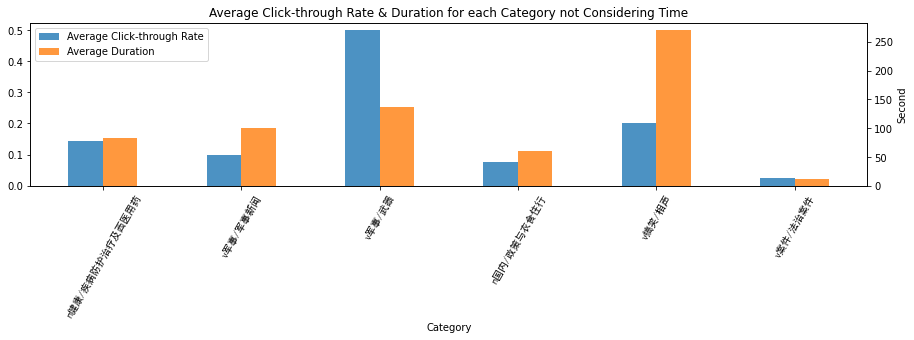

In [82]:
title = 'Average Click-through Rate & Duration for each Category not Considering Time ({})'.format(time.strftime('%Y%m%d-%H%M%S'))
width = 0.25
alpha = 0.8
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
#fontP.set_size(11)

fig, ax = plt.subplots(figsize=(15,3))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.title(title)

xticklabels = [idx2key[_] for _ in np.arange(len(contentTC2ID))[np.where(avg_clicked_rate != 0)]]
ax.set_xticks(range(len(xticklabels)))
ax.set_xticklabels(xticklabels, fontproperties=fontP, rotation=60)

bar1 = ax.bar(
    np.arange(len(xticklabels)) - width / 2, 
    avg_clicked_rate[np.where(avg_clicked_rate != 0)], 
    color='tab:blue', 
    width=width, 
    alpha=alpha,
    label='Average Click-through Rate'
)
ax.set_xlabel('Category')
# ax.set_yscale('log')

bar2 = ax2.bar(
    np.arange(len(xticklabels)) + width / 2, 
    avg_clicked_duration[np.where(avg_clicked_rate != 0)], 
    color='tab:orange', 
    width=width,
    alpha=alpha,
    label='Average Duration'
)
ax2.set_ylabel('Second')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')


# Consider Time

In [56]:
userID = candidateIDs[2922]
idx = userID2idx[userID]
aaa, bb, cc = idx[0:3], idx[3:5], idx[5:7]
df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)
df

,Unnamed: 0,userID,requestID,date,time,sequence
0,501811,1424832354,712416177_1634948219105_253,20211023,08,133686913039:0:0;133686608114:0:0;133686776980...
1,501812,1424832354,712416177_1634948384642_2132,20211023,08,506933131:0:0;133660671434:0:0;506703134:0:0;5...
2,501813,1424832354,712416177_1634948398282_8590,20211023,08,506673931:0:0;133660429340:0:0;506863458:0:0;5...
3,501814,1424832354,712416177_1634948707955_8247,20211023,08,506804186:0:0;133654974304:0:0;506340121:0:0;5...
4,501815,1424832354,712416177_1635010272019_9422,20211024,01,506881494:0:0;133665767233:0:0;506456205:0:0;5...
...,...,...,...,...,...,...
106,28674429,1424832354,712416177_1635252249860_7179,20211026,20,507802806:0:0;133666710695:0:0;507564202:0:0;5...
107,28674430,1424832354,712416177_1635252390240_4853,20211026,20,507934679:0:0;133661777234:0:0;507740381:0:0;5...
108,28674431,1424832354,712416177_1635252477812_8521,20211026,20,507470993:0:0;133526283647:0:0;508104825:0:0;5...
109,28674432,1424832354,712416177_1635392134553_8672,20211028,11,507364336:0:0;133671393449:0:0;507475473:0:0;5...


In [57]:
for index, row in df.iterrows():
    print(row['time'], row.sequence)
    for icd in row.sequence.split(';'):
        print(icd)
    break

08 133686913039:0:0;133686608114:0:0;133686776980:0:0;133686542073:0:0;133686652978:0:0;133686691729:0:0;133686606529:0:0;133686692327:0:0
133686913039:0:0
133686608114:0:0
133686776980:0:0
133686542073:0:0
133686652978:0:0
133686691729:0:0
133686606529:0:0
133686692327:0:0


In [65]:
def time_distance(src, tgt, denominator=12+1e-6):
    """
    :return: range in [0, 12 / denominator]
    """
    a, b = (src, tgt) if src < tgt else (tgt, src)  # a < b
    return min(b-a, a + 24 - b) / denominator

In [66]:
time_distance(20,8), time_distance(23,1), time_distance(23,1), time_distance(eval('0'),0)

(0.9999999166666736, 0.16666665277777895, 0.16666665277777895, 0.0)

In [67]:
clickeds = np.zeros(len(contentTC2ID))
durations = np.zeros(len(contentTC2ID))
recommeds = np.zeros(len(contentTC2ID))
have_recommed_IDs = []

for index, row in df.iterrows():
    multiplier = 1 - time_distance(int(row.time), 20)
    for icd in row.sequence.split(';'):
        i, c, d = icd.split(':')
        have_recommed_IDs.append(i)
        contentIdx = contentID2idx[i]
        if eval(c):
            clickeds[contentIdx] += multiplier
            durations[contentIdx] += multiplier * eval(d)
        recommeds[contentIdx] += multiplier

In [68]:
len(have_recommed_IDs), len(set(have_recommed_IDs))

(800, 794)

In [69]:
have_recommed_IDs = set(have_recommed_IDs)

In [70]:
avg_clicked_rate = np.divide(clickeds, recommeds, out=np.zeros_like(clickeds), where=recommeds!=0)
avg_clicked_duration = np.divide(durations, clickeds, out=np.zeros_like(durations), where=clickeds!=0)

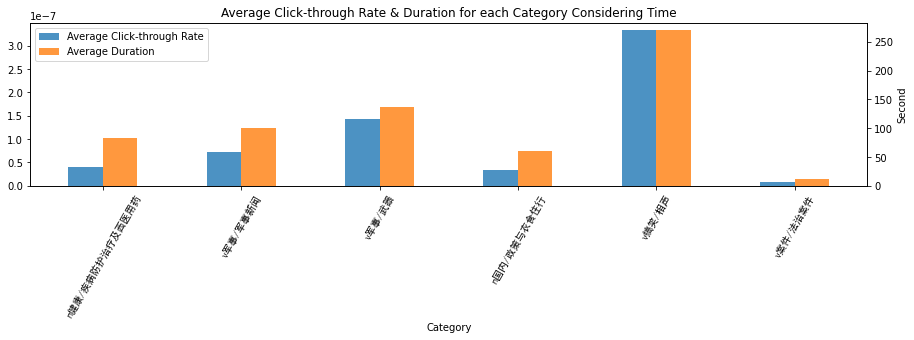

In [77]:
title = 'Average Click-through Rate & Duration for each Category Considering Time ({})'.format(time.strftime('%Y%m%d-%H%M%S'))
width = 0.25
alpha = 0.8
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
#fontP.set_size(11)

fig, ax = plt.subplots(figsize=(15,3))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.title(title)

xticklabels = [idx2key[_] for _ in np.arange(len(contentTC2ID))[np.where(avg_clicked_rate != 0)]]
ax.set_xticks(range(len(xticklabels)))
ax.set_xticklabels(xticklabels, fontproperties=fontP, rotation=60)

bar1 = ax.bar(
    np.arange(len(xticklabels)) - width / 2, 
    avg_clicked_rate[np.where(avg_clicked_rate != 0)], 
    color='tab:blue', 
    width=width, 
    alpha=alpha,
    label='Average Click-through Rate'
)
ax.set_xlabel('Category')
# ax.set_yscale('log')

bar2 = ax2.bar(
    np.arange(len(xticklabels)) + width / 2, 
    avg_clicked_duration[np.where(avg_clicked_rate != 0)], 
    color='tab:orange', 
    width=width,
    alpha=alpha,
    label='Average Duration'
)
ax2.set_ylabel('Second')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')


# Score with Rate & Duration

[Standardization vs. min-max normalization](https://www.educative.io/edpresso/standardization-vs-min-max-normalization) (this is only for 2D!!)
> ```python
> from sklearn.preprocessing import MinMaxScaler
data = [[-1, -2], [0.5, 2], [0, 5], [12, 18]]
scaler = MinMaxScaler()
scaler.fit(data)
MinMaxScaler()
print(scaler.transform(data))
> ```

In [72]:
def MinMaxScaler(data, default=0.1):
    m, M = min(data), max(data)
    if m != M:
        return [(_ - m) / (M - m) for _ in data]
    else:
        return [default for _ in data]

In [73]:
MinMaxScaler([1,2,3]), MinMaxScaler([1,1,1])

([0.0, 0.5, 1.0], [0.1, 0.1, 0.1])

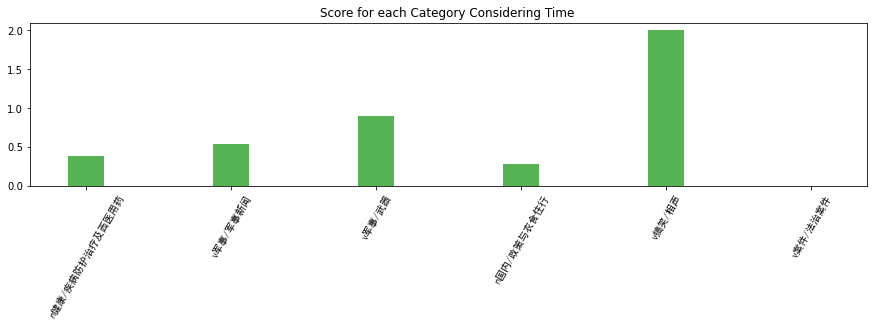

In [78]:
title = 'Score for each Category Considering Time ({})'.format(time.strftime('%Y%m%d-%H%M%S'))
width = 0.25
alpha = 0.8
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
#fontP.set_size(11)

fig, ax = plt.subplots(figsize=(15,3))
plt.title(title)

xticklabels = [idx2key[_] for _ in np.arange(len(contentTC2ID))[np.where(avg_clicked_rate != 0)]]
ax.set_xticks(range(len(xticklabels)))
ax.set_xticklabels(xticklabels, fontproperties=fontP, rotation=60)


score1 = MinMaxScaler(avg_clicked_rate[np.where(avg_clicked_rate != 0)])
score2 = MinMaxScaler(avg_clicked_duration[np.where(avg_clicked_rate != 0)])
score = np.array([x + y for x, y in zip(score1, score2)])

ax = plt.bar(
    np.arange(len(xticklabels)), 
    score,
    color='tab:green',
    width=width,
    alpha=alpha,
    label='Score'
)

plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

In [83]:
score = torch.tensor(score)

In [84]:
values, indices = torch.topk(score, k=5)
values, indices

(tensor([2.0000, 0.8991, 0.5413, 0.3755, 0.2776], dtype=torch.float64),
 tensor([4, 2, 1, 0, 3]))

In [85]:
contentTCs = [xticklabels[_] for _ in indices]
contentTCs

['v搞笑/相声', 'v军事/武器', 'v军事/军事新闻', 'n健康/疾病防护治疗及西医用药', 'n国内/政策与衣食住行']

In [86]:
counts = torch.ceil(values * 10 / torch.sum(values)).type(torch.int).tolist()
counts

[5, 3, 2, 1, 1]

# Sample
Use `contentScore.npy` which is calculated in c.ipynb.

In [29]:
userID

'1642551254'

In [30]:
list(zip(contentTCs, counts))

[('v动漫/其他', 3),
 ('v军事/军史', 3),
 ('v财经/公司新闻', 3),
 ('v综艺/其他', 2),
 ('v科技/机械与高科技工程', 2)]

In [31]:
with open(data_path + 'contentID2idx_1on1.pickle', 'rb') as handle:
    contentID2idx_1on1 = pickle.load(handle)
with open(data_path + 'contentIdx2ID_1on1.pickle', 'rb') as handle:
    contentIdx2ID_1on1 = pickle.load(handle)
len(contentID2idx_1on1), len(contentIdx2ID_1on1)

(2510703, 2510703)

In [32]:
contentScores = torch.tensor(np.load(data_path + 'contentScores.npy'))
len(contentScores)

2510703

In [33]:
k = 0
terminal_k = 10
result = []
while True:
    for contentTC, count in zip(contentTCs, counts):
        # do not recommend same content
        target_content_IDs = set(contentTC2ID[contentTC])
        print(contentTC, 'target counts:', len(target_content_IDs), '→ ', end='')
        target_content_IDs = target_content_IDs - have_recommed_IDs
        print(len(target_content_IDs))
        
        # map to index (range in 2510703)
        target_content_Idxes = [contentID2idx_1on1[_] for _ in target_content_IDs]
        
        # scores
        target_scores = contentScores[target_content_Idxes]
        top_values, top_indices = torch.topk(target_scores, min(count, len(target_scores)))
        for i, value in enumerate(top_values):
            indice = top_indices[i]
            result.append(contentIdx2ID_1on1[target_content_Idxes[indice]])
            k += 1
            if k == terminal_k:
                break
        else:
            continue
        break
    else:
        assert False
    break
result

v动漫/其他 target counts: 2005 → 2004
v军事/军史 target counts: 939 → 928
v财经/公司新闻 target counts: 792 → 790
v综艺/其他 target counts: 6824 → 6821


['133686242032',
 '133663752853',
 '133663752851',
 '133680924496',
 '133682743655',
 '133684776889',
 '133677424853',
 '133677424856',
 '133672814290',
 '133665825681']

In [34]:
doc_info.iloc[contentID2idx_1on1['133671447633']]

NameError: name 'doc_info' is not defined

In [ ]:
doc_info = pd.read_csv(data_path + 'doc_info.csv', dtype=str)
doc_info